## Feature Selection

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv("TransformedData.csv", parse_dates=True)
df

,Posted Time,Longitude,Latitude,Area,Width,Length,Floors,Rooms,Toilets,Price per m2,...,House Direction_SOUTHWEST,House Direction_WEST,Furnishing Sell_BASIC_FINISHING,Furnishing Sell_FULLY_FURNISHED,Furnishing Sell_HIGH_END_FURNITURE,Furnishing Sell_RAW_HANDOVER,Land Type_AGRICULTURAL_LAND,Land Type_INDUSTRIAL_LAND,Land Type_PROJECT_LAND,Land Type_RESIDENTIAL_LAND
0,31/01/2025,10.400602,4.003590,10.000000,2.236068,4.472136,0.000000,0.000000,0.000000,1.581139,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,01/02/2025,10.398891,4.009621,10.000000,2.236068,4.472136,0.000000,0.000000,0.000000,1.581139,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,13/01/2025,10.399521,4.008289,8.660254,2.236068,3.872983,0.000000,0.000000,0.000000,1.932184,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,02/02/2025,10.397751,4.005646,10.000000,2.236068,4.472136,0.000000,0.000000,0.000000,2.236068,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,05/02/2025,10.400602,3.996527,10.954451,2.236068,4.472136,0.000000,0.000000,0.000000,2.041241,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17452,24/05/2025,10.403665,4.006381,11.401754,2.236068,5.099020,1.414214,1.732051,1.732051,9.156754,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17453,16/05/2025,10.402673,4.004094,8.366600,2.236068,3.741657,2.449490,3.316625,2.645751,12.535663,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17454,19/05/2025,10.404082,4.005183,10.488088,2.449490,4.289510,1.414214,2.000000,1.414214,10.444659,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
17455,18/05/2025,10.404182,4.005235,8.944272,2.236068,4.242641,2.645751,3.316625,2.645751,12.500000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
features = ["Longitude", "Latitude", "Area", "Width", "Length", "Floors", "Rooms", "Toilets"]
X = df[features]
y = df["Price per m2"]

### Data Visualization

#### Relationship of Target Variable to Input Variables

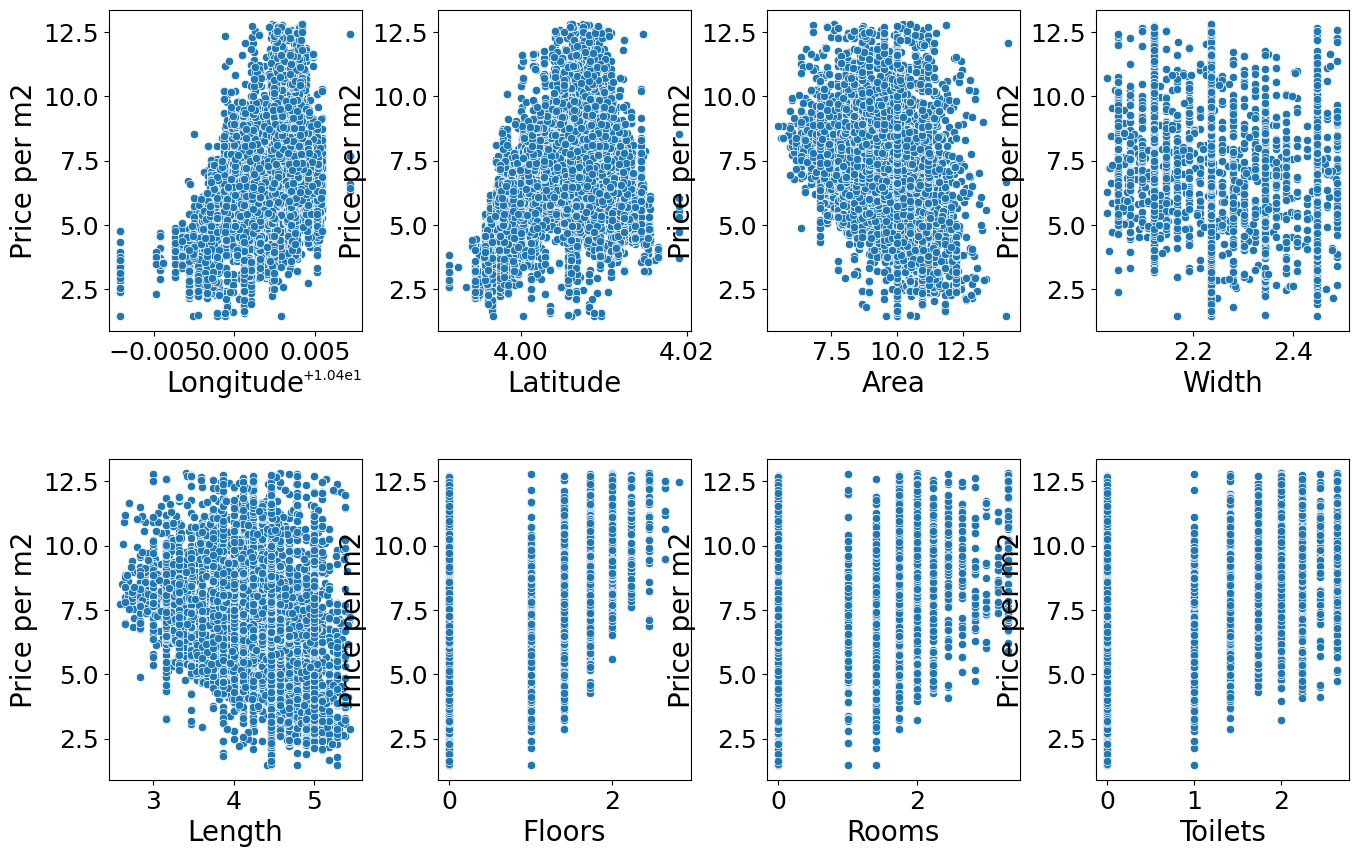

In [22]:
features = ["Longitude", "Latitude", "Area", "Width", "Length", "Floors", "Rooms", "Toilets"]

fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df["Price per m2"], ax=axes[i])
    axes[i].set_xlabel(feature, fontsize=20)
    axes[i].set_ylabel("Price per m2", fontsize=20)
    axes[i].tick_params(axis="x", labelsize=18)
    axes[i].tick_params(axis="y", labelsize=18)

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

#### Comment
 - In the graph `Price per m2 & Area`, the points have a slight upward trend in distribution (positive correlation). 
 - The remaining features have a clear scatter distribution. 
 - There are some features that are concentrated at certain points
#### Conclusion
 - Weak correlation: Only `Price per m2` and `Area` have a slight increasing trend, indicating that there may be a weak positive correlation.
 - Other variables have no clear correlation: `Longitude, Latitude, Width, Length` have no specific pattern, and are distributed quite randomly.
 - There are clusters of data at some points: Some variables have concentrated points, possibly because the data is limited to some ranges or is influenced by other factors such as location, property type.

#### Using HeatMap to Represent Correlation of Input Variable Pairs

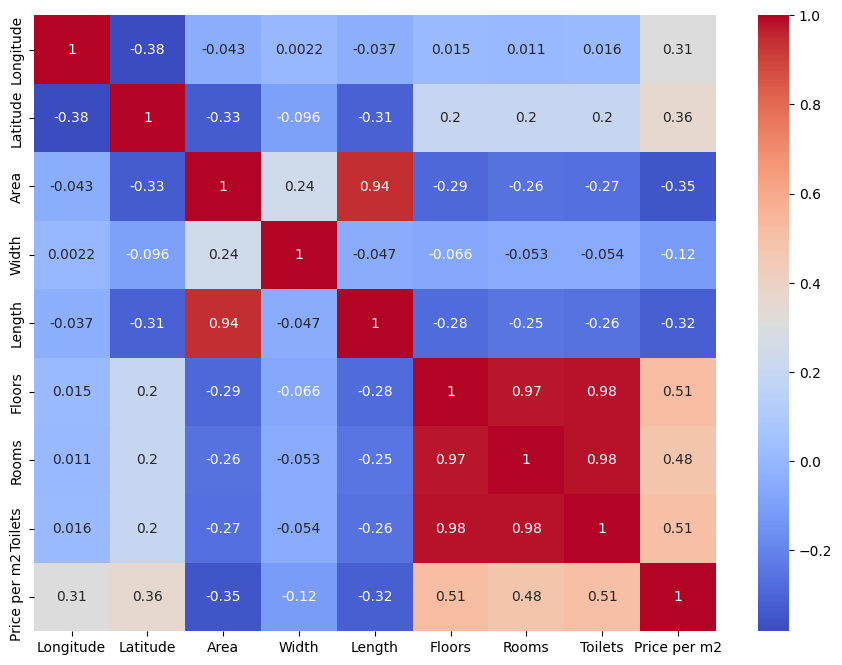

In [23]:
cols_to_include = ["Longitude", "Latitude", "Area", "Width", "Length", "Floors", "Rooms", "Toilets", "Price per m2"]
plt.figure(figsize=(11, 8))
sns.heatmap(df[cols_to_include].corr(), annot=True, cmap="coolwarm")

plt.show()

#### Using ScatterPlot to represent the relationship between 2 variables `Length` and `Area`

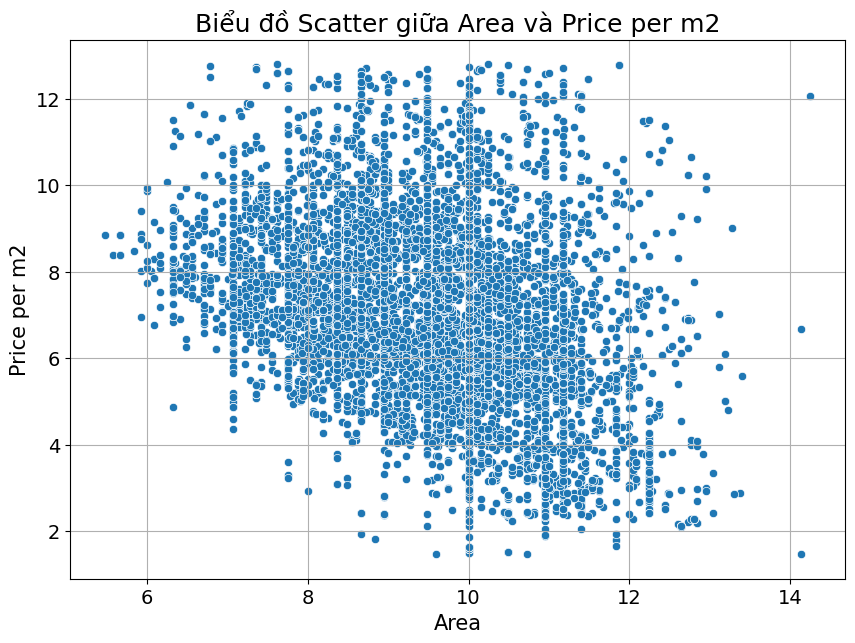

In [24]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Area', y='Price per m2', data=df)
plt.title('Biểu đồ Scatter giữa Area và Price per m2', fontsize=18)
plt.xlabel('Area', fontsize=15)
plt.ylabel('Price per m2', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

### Statistical methods
#### Univariate feature selection

In [25]:
selector_best = SelectKBest(score_func=mutual_info_regression, k=12)
X_kbest = selector_best.fit_transform(X, y)
selected_features = X.columns[selector_best.get_support()]
scores = selector_best.scores_

sorted_indices = np.argsort(scores)[::-1]

print("Selected features in order from best to worst:")
for index in sorted_indices:
  print(f"{selected_features[index]}: {scores[index]}")

Selected features in order from best to worst:
Latitude: 1.6429613891001287
Longitude: 1.5976306122895325
Area: 1.4362578880097185
Length: 1.0141918598019957
Floors: 0.402667504904769
Toilets: 0.38882107298172874
Rooms: 0.365376713078446
Width: 0.2740826055343555


##### Conclusion:
For statistical methods, by using the application of univariate statistical testing, it is possible to arrange the order of variables from most important to least important. The Longitude variable is considered the most important variable among the input variables.


### Recursive feature elimination
#### Recursive feature elimination with cross-validation

In [26]:
min_features_to_select = 1
regressor = LinearRegression()

cv = KFold(n_splits=5)

rfecv = RFECV(
    estimator=regressor,
    step=1,
    cv=cv,
    scoring="neg_mean_squared_error",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")
selected_features = X.columns[rfecv.support_]
print("Selected features:", selected_features)

Optimal number of features: 8
Selected features: Index(['Longitude', 'Latitude', 'Area', 'Width', 'Length', 'Floors', 'Rooms',
       'Toilets'],
      dtype='object')


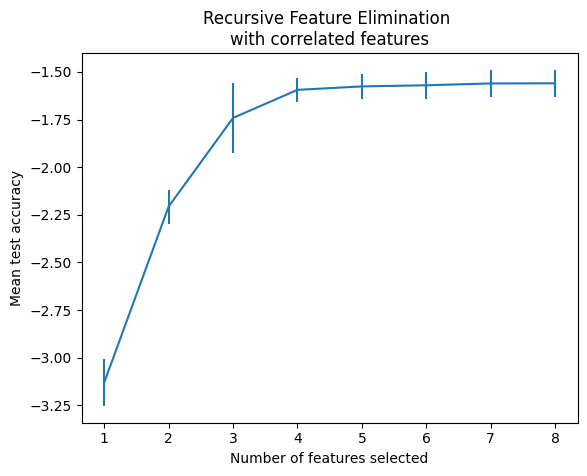

In [27]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()